In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
t_max = pd.read_csv('../data/t_max.csv')
t_min = pd.read_csv('../data/t_min.csv')
t_avg = pd.read_csv('../data/t_avg.csv')

t_max.set_index('Date', inplace=True)
t_min.set_index('Date', inplace=True)
t_avg.set_index('Date', inplace=True)

In [98]:
def calculate_linear_trend(data):
    x = np.arange(len(data))
    y = data
    m, c = np.polyfit(x, y, 1)
    
    return m, c, len(data)

In [99]:
def calculate_quadratic_trend(data):
    x = np.arange(len(data))
    y = data
    a, b, c = np.polyfit(x, y, 2)
    
    residuals = y - (a * x**2 + b * x + c)
    
    return a, b, c, residuals, len(data)

Linear trends:
Max Temperature
Amsterdam: 0.30450°C/decade
Amsterdam: -1.430337621786764e-07x^2 + 0.0005439573975655092x + -0.3446876709240129
Atlanta: 0.47282°C/decade
Atlanta: -4.843317734731766e-07x^2 + 0.0018419137345184872x + -1.16715933643987
Boston: 0.96779°C/decade
Boston: -7.193510154636483e-07x^2 + 0.002735691911808252x + -1.7335167747824933
Burbank: -4.40826°C/decade
Burbank: -4.6701169420833453e-07x^2 + 0.0017760454730742846x + -1.1254208147713463
Chicago: 2.15618°C/decade
Chicago: -5.380191852547868e-07x^2 + 0.0020460869615239546x + -1.2965371046190028
Cincinnati: 0.89677°C/decade
Cincinnati: -5.602861733579909e-07x^2 + 0.0021307683172804353x + -1.3501968570500187
Dallas: 0.71383°C/decade
Dallas: -2.4292672735669294e-07x^2 + 0.0009238503441374938x + -0.5854131680684433
Essen: 0.57222°C/decade
Essen: -1.960948615044772e-07x^2 + 0.0007457487583015277x + -0.4725561298437342
Houston: 1.25035°C/decade
Houston: -4.278731562003778e-07x^2 + 0.0016272016130300336x + -1.031103422123

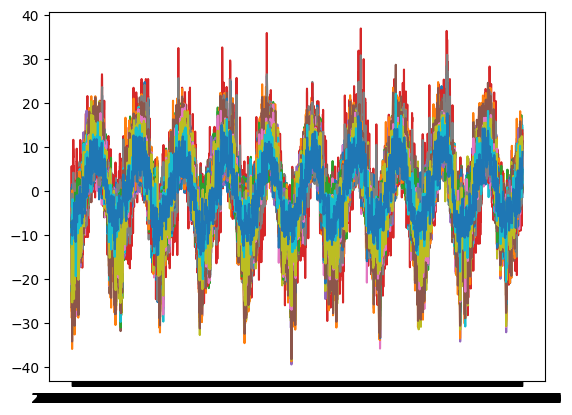

In [ ]:
print('Linear trends:')
print('Max Temperature')
for city in t_max.columns:
    data = t_max[city].astype(float)
    m, c, l = calculate_linear_trend(data)
    print(f'{city}: {m*l:.5f}°C/decade')
    detrended = data - (m*np.arange(len(t_max)) + c)
    
    a, b, c, r, l = calculate_quadratic_trend(detrended)
    print(f'{city}: {a}x^2 + {b}x + {c}')
    
    plt.plot(r)
    
    
print('')

print('Min Temperature')
for city in t_min.columns:
    data = t_min[city].astype(float)
    m, c, l = calculate_linear_trend(data)
    print(f'{city}: {m*l:.5f}°C/decade')
    detrended = data - (m*np.arange(len(t_min)) + c)
    
    a, b, c, r, l = calculate_quadratic_trend(detrended)
    print(f'{city}: {a}x^2 + {b}x + {c}')
    
    plt.plot(r)
    

print('')

print('Average Temperature')
for city in t_avg.columns:
    data = t_avg[city].astype(float)
    m, c, l = calculate_linear_trend(data)
    print(f'{city}: {m*l:.5f}°C/decade')
    detrended = data - (m*np.arange(len(t_avg)) + c)
    
    a, b, c, r, l = calculate_quadratic_trend(detrended)
    print(f'{city}: {a}x^2 + {b}x + {c}')
    
    plt.plot(r)